In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
# calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
# The data lies in the following URL.
#url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"


In [3]:
# read file

pima_df = pd.read_csv("pima_diabetes.csv")

In [4]:

pima_df.head(10)

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
pima_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   Test    768 non-null    int64  
 5   Mass    768 non-null    float64
 6   Pedi    768 non-null    float64
 7   Age     768 non-null    int64  
 8   Class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Lets analysze the distribution of the various attributes
pima_df.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values

pima_df['Class'].value_counts()
# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

0    500
1    268
Name: Class, dtype: int64

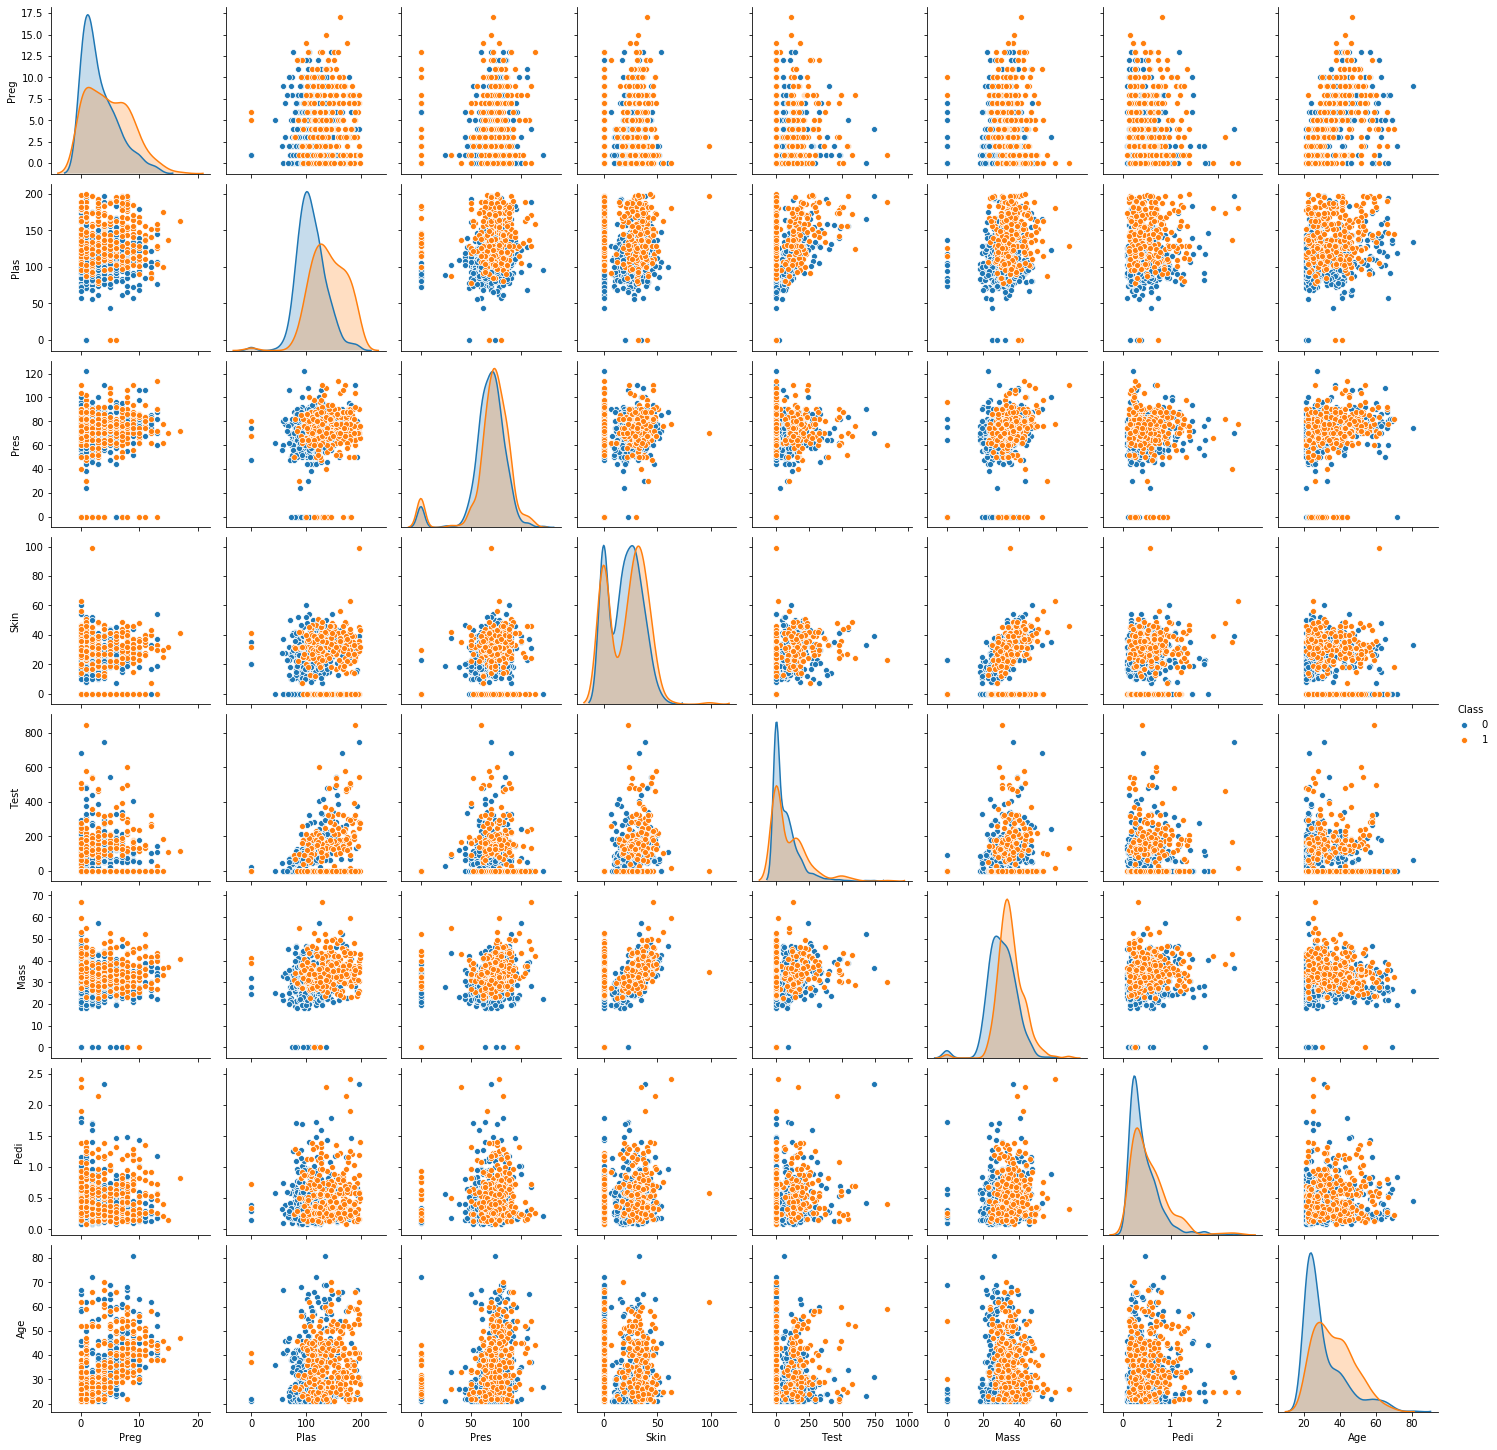

In [8]:
# Pairplot using sns

#sns.pairplot(pima_df, hue='Class', diag_kind="kde")
sns.pairplot(pima_df, diag_kind="kde", hue = "Class")

In [9]:
#data for some the attributes are skewed


In [10]:
# Attributes which look normally distributed (plas, pres, skin, and mass).
# Some of the attributes look like they may have an exponential distribution (preg, test, pedi, age).
# Age should probably have a normal distribution, the constraints on the data collection may have skewed the distribution.

# There is no obvious relationship between age and onset of diabetes.
# There is no obvious relationship between pedi function and onset of diabetes.


In [8]:
X = pima_df.drop(["Class"], axis=1)

In [9]:
y = pima_df["Class"]

In [10]:
#array = pima_df.values
#X = array[:,0:7] # select all rows and first 8 columns which are the attributes
#y = array[:,8]   # select all rows and the 9th column which is the classification "Yes", "No" for diabeties

# instead, this could be done with DF also


In [16]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
#print(X_train.head())
#print(y_train.head())

In [27]:
from sklearn.linear_model import LogisticRegression

# Fit the model 
model = LogisticRegression(solver='lbfgs', max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=200, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_predict = model.predict(X_test)

In [29]:
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.7532467532467533
[[124  33]
 [ 24  50]]


In [20]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231



In [21]:
# Print the intercept and coefficients
print("Intercept: ", model.intercept_)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

Intercept:  [-8.55635517]
The coefficient for Preg is 0.08621888904685038
The coefficient for Plas is 0.03408757514977327
The coefficient for Pres is -0.011700856387474414
The coefficient for Skin is 0.00621230256208579
The coefficient for Test is -0.001262647925088476
The coefficient for Mass is 0.08996389926972052
The coefficient for Pedi is 0.6839720649300256
The coefficient for Age is 0.024913451637932193


In [22]:
pred_prob_y = model.predict_proba(X_test)

#decisions = (model.predict_proba(X_test) >= 0.3).astype(int)

In [21]:
print(pred_prob_y)

[[0.45910354 0.54089646]
 [0.79169457 0.20830543]
 [0.52271492 0.47728508]
 [0.91501457 0.08498543]
 [0.90769317 0.09230683]
 [0.95843404 0.04156596]
 [0.92302624 0.07697376]
 [0.68926061 0.31073939]
 [0.94045532 0.05954468]
 [0.65133457 0.34866543]
 [0.93500937 0.06499063]
 [0.78442931 0.21557069]
 [0.07802172 0.92197828]
 [0.68241443 0.31758557]
 [0.89327103 0.10672897]
 [0.31036934 0.68963066]
 [0.25858311 0.74141689]
 [0.95910606 0.04089394]
 [0.90714117 0.09285883]
 [0.07235205 0.92764795]
 [0.68949048 0.31050952]
 [0.53502703 0.46497297]
 [0.6430529  0.3569471 ]
 [0.78211858 0.21788142]
 [0.84128345 0.15871655]
 [0.32383634 0.67616366]
 [0.68238282 0.31761718]
 [0.98809865 0.01190135]
 [0.3049851  0.6950149 ]
 [0.1644244  0.8355756 ]
 [0.78732459 0.21267541]
 [0.96301006 0.03698994]
 [0.9358788  0.0641212 ]
 [0.8433387  0.1566613 ]
 [0.5602211  0.4397789 ]
 [0.89060032 0.10939968]
 [0.66526587 0.33473413]
 [0.75062725 0.24937275]
 [0.23262201 0.76737799]
 [0.94580355 0.05419645]


In [23]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))

In [24]:
print(pred_proba_df)

            0         1
0    0.045124  0.954876
1    0.841600  0.158400
2    0.916616  0.083384
3    0.358695  0.641305
4    0.890547  0.109453
..        ...       ...
226  0.775520  0.224480
227  0.772404  0.227596
228  0.953435  0.046565
229  0.830613  0.169387
230  0.574752  0.425248

[231 rows x 2 columns]


In [25]:
THRESHOLD = 0.2
y_pred_new = np.where(model.predict_proba(X_test)[:,1] >= THRESHOLD, 1, 0)

print(metrics.accuracy_score(y_test, y_pred_new))
print(metrics.confusion_matrix(y_test, y_pred_new))

#pd.DataFrame(data=[accuracy_score(y_test, y_pred_new), recall_score(y_test, y_pred_new),
#precision_score(y_test, y_pred_new), roc_auc_score(y_test, y_pred_new)], 
#index=["accuracy", "recall", "precision", "roc_auc_score"])

0.6926406926406926
[[93 64]
 [ 7 67]]


In [26]:
threshold_list = [0.1,0.2,0.3,0.4,0.5,0.6,0.7]
for i in threshold_list:
    print ('\n**** For Threshold = {} ****'.format(i))
    y_pred_new = np.where(model.predict_proba(X_test)[:,1] >= i, 1, 0)
    print('Accuracy : %.2f' % metrics.accuracy_score(y_test, y_pred_new))
    print('Precision: %.2f' % metrics.precision_score(y_test, y_pred_new,pos_label=1))
    print('Recall   : %.2f' % metrics.recall_score(y_test, y_pred_new,pos_label=1))
    print(metrics.confusion_matrix(y_test, y_pred_new))
    metrics.confusion_matrix
   


**** For Threshold = 0.1 ****
Accuracy : 0.52
Precision: 0.40
Recall   : 0.99
[[ 47 110]
 [  1  73]]

**** For Threshold = 0.2 ****
Accuracy : 0.69
Precision: 0.51
Recall   : 0.91
[[93 64]
 [ 7 67]]

**** For Threshold = 0.3 ****
Accuracy : 0.73
Precision: 0.55
Recall   : 0.77
[[111  46]
 [ 17  57]]

**** For Threshold = 0.4 ****
Accuracy : 0.76
Precision: 0.62
Recall   : 0.62
[[129  28]
 [ 28  46]]

**** For Threshold = 0.5 ****
Accuracy : 0.78
Precision: 0.71
Recall   : 0.53
[[141  16]
 [ 35  39]]

**** For Threshold = 0.6 ****
Accuracy : 0.78
Precision: 0.76
Recall   : 0.47
[[146  11]
 [ 39  35]]

**** For Threshold = 0.7 ****
Accuracy : 0.76
Precision: 0.80
Recall   : 0.32
[[151   6]
 [ 50  24]]
